In [31]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [32]:
data = sio.loadmat('AMZN_20141103.mat')

In [33]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [34]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]
print(f"midprice: {np.mean(midprice):.2f}")
print(f"microprice: {np.mean(microprice):.2f}")

midprice: 306.23
microprice: 306.23


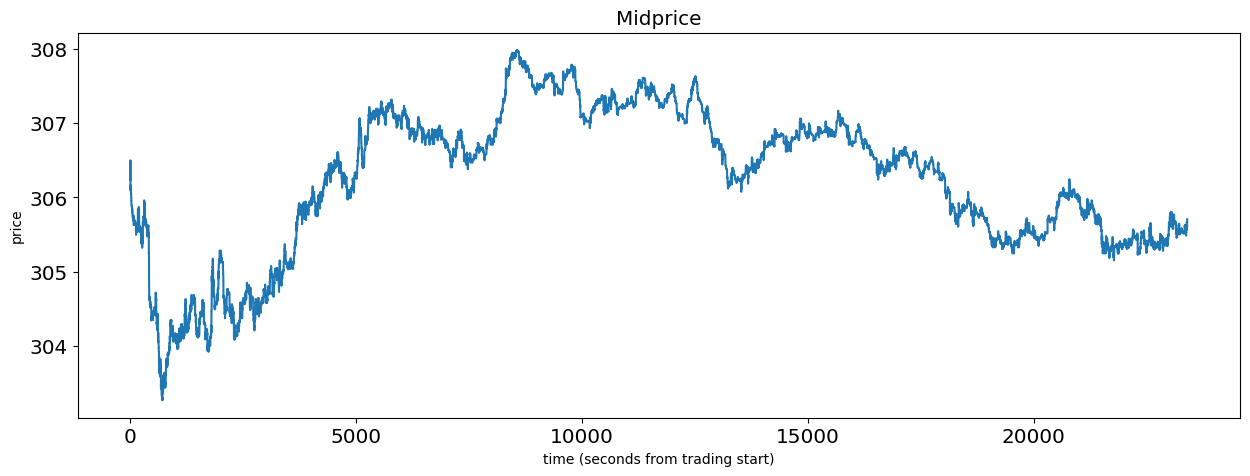

In [35]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [36]:
type(midprice)

numpy.ndarray

In [37]:
import pandas as pd

In [38]:
midp = pd.DataFrame(midprice)

In [39]:
midp.describe()

,0
count,234000.000000
mean,306.234948
std,0.971306
min,303.265000
25%,305.525000
50%,306.430000
75%,306.980000
max,307.985000


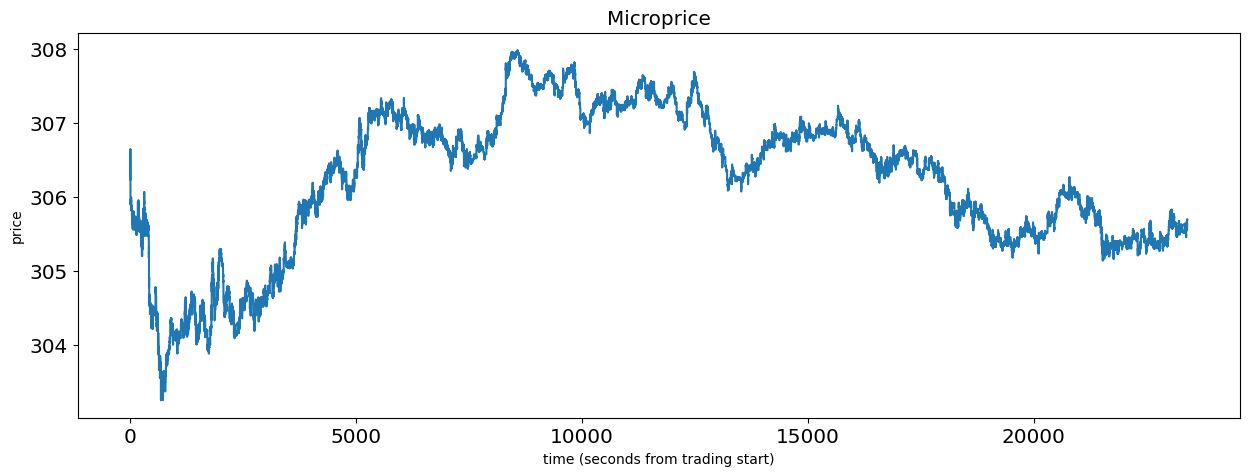

In [40]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [41]:
microp = pd.DataFrame(microprice)

In [42]:
microp.describe()

,0
count,234000.000000
mean,306.230662
std,0.972256
min,303.251538
25%,305.521239
50%,306.424921
75%,306.970000
max,307.987500


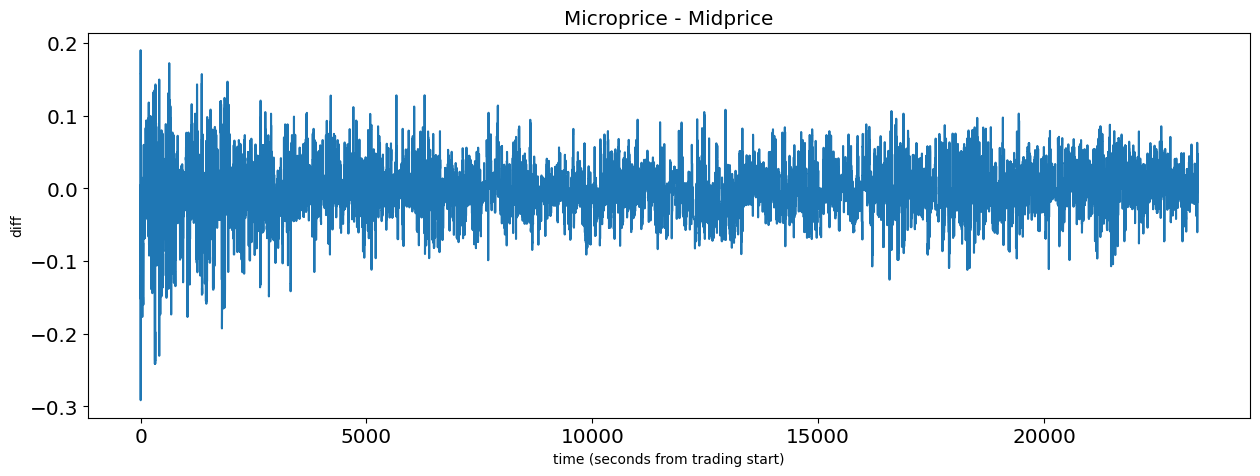

In [43]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

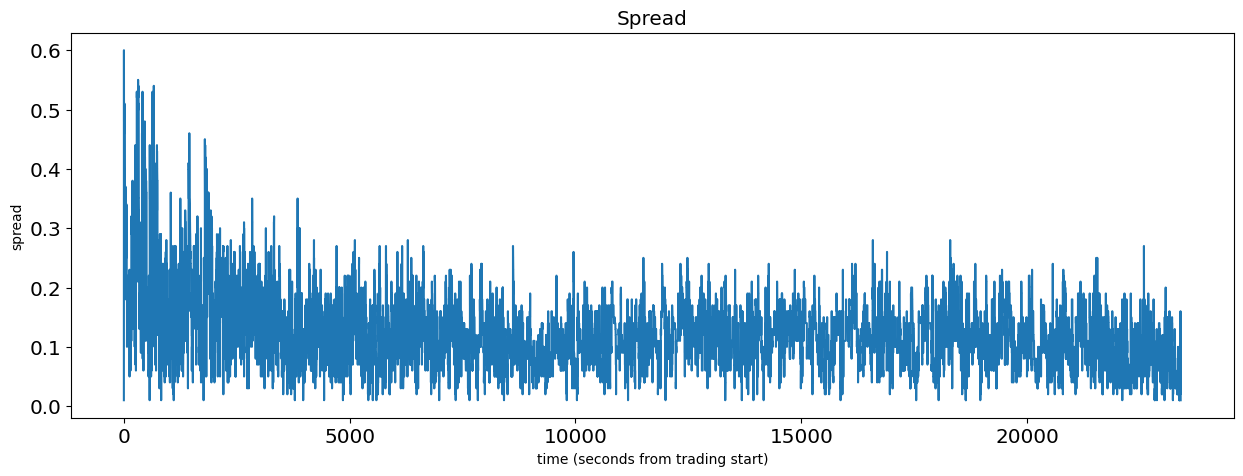

spread: 0.12


In [44]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()
print(f"spread: {np.mean(spread):.2f}")

In [45]:
spread = pd.DataFrame(spread)

In [46]:
spread.describe()

,0
count,234000.000000
mean,0.123988
std,0.055254
min,0.010000
25%,0.090000
50%,0.120000
75%,0.150000
max,0.600000


In [47]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

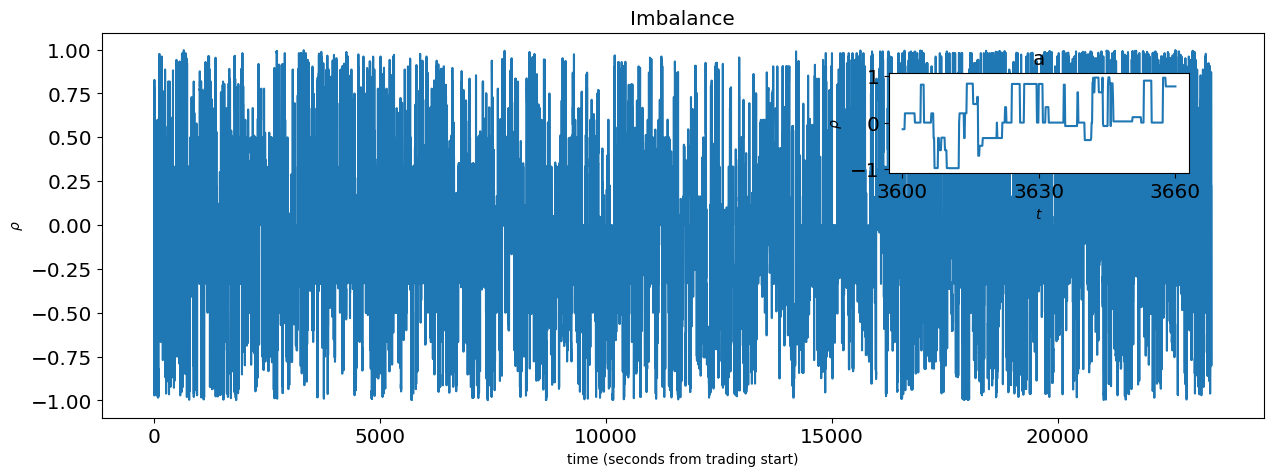

In [48]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [49]:
rho = pd.DataFrame(rho)

In [50]:
rho.describe()

,0
count,234000.000000
mean,-0.050551
std,0.486801
min,-0.998668
25%,-0.356913
50%,0.000000
75%,0.324503
max,0.996672
